# Problem 1: Measuring Dark Matter

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from astropy import units as u
from astropy import constants

## (a) 
The file exercise3 velocities.csv on Moodle contains velocities measured for stars in the direction of Draco, given in [km s$^{−1}$]. Extract the velocity dispersion σr from that file. What possible error could occur here? Try to deal with it.

In [2]:
data = pd.read_csv("exercise3_velocities.csv", index_col=0)

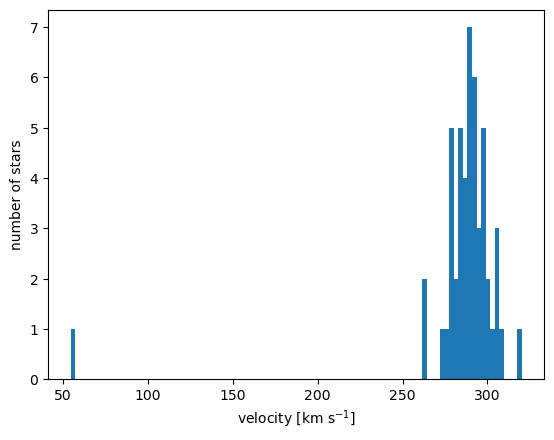

In [3]:
plt.hist(data.velocity, bins=100)
plt.xlabel("velocity [km s$^{-1}$]")
plt.ylabel("number of stars")
plt.show()

It looks like there is an outlier. Maybe it's a star that does not actually belong to the Draco galaxy. Let's exclude it from the analysis.

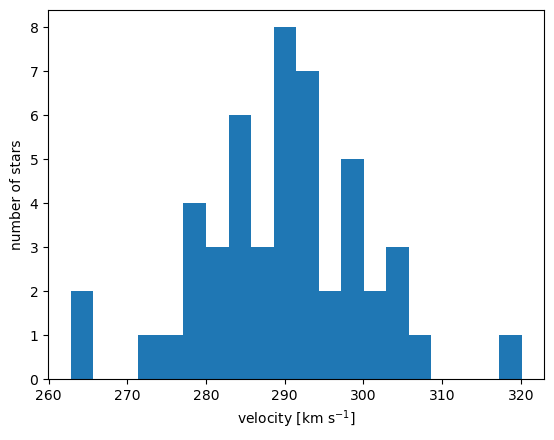

In [4]:
outlier_mask = data.velocity < 100
cleaned_velocities = data.velocity[~outlier_mask]

plt.hist(cleaned_velocities, bins=20)
plt.xlabel("velocity [km s$^{-1}$]")
plt.ylabel("number of stars")
plt.show()

The dispersion of this distribution is given by the standard deviation

In [5]:
disp = np.std(cleaned_velocities) * u.km / u.s
print(f"The velocity dispersion is {disp:.2f}")

The velocity dispersion is 10.62 km / s


# (b) 
The Virial theorem to connects the mass of a system with the velocity dispersion. Are the requirements for using this theorem satisfied here?

* Draco is a galaxy where we can assume thermodynamic equilibrium. Thus the virial theorem is valid.

# (c) 
Calculate the mass of the Draco galaxy from the dispersion calculated in a). What is Draco’s mass-to-light ratio?

* The virial theorem states that

$ \frac{GM}{R} \approx \sigma^2$

The mass contained in a sphere with radius $R$ is then

$ M = \frac{R \sigma^2}{G} $

In [17]:
rh = 120 * u.pc
halfmass = rh * disp ** 2 / constants.G
print(
    f"The virial half-mass of Draco is {mass.to('kg'):.2e} \n"
    f"That is {halfmass.to('Msun'):.2e}"
)

The virial half-mass of Draco is 6.25e+36 kg 
That is 3.14e+06 solMass


Our sun is a fairly common star. Assuming all stars have the mass of our sun the mass-to-light ratio $MTL$ is given by 

$ MTL = \frac{L }{L_{\odot}} \cdot \frac{M_{\odot}}{m} $

In [16]:
draco_lum = 1.8e5 * u.Lsun * 1/2
mtl = draco_lum / constants.L_sun * constants.M_sun / halfmass
print(f"Draco's mass-to-light ratio is {mtl.to('')*100:.2f}%")

Draco's mass-to-light ratio is 2.86%


In [19]:
(6.6e5 * u.Msun).to('kg')

<Quantity 1.31235051e+36 kg>

In [20]:
(halfmass / draco_lum).to("kg / W")

<Quantity 181510.58466518 kg / W>